In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [10]:
data_dir = '/kaggle/input/hyundai-dataset/'

train = pd.read_csv(data_dir + 'train.csv')
test = pd.read_csv(data_dir + 'test.csv')
submission = pd.read_csv(data_dir + 'sample_submission.csv')

In [11]:
def null_checker(data, target):
    
    for c in data.drop(target, axis = 1).columns.tolist():
        null_ratio = data[c].isna().sum() / len(data[c])*100
        
        print(f'{c} null ratio:',null_ratio)

In [12]:
null_checker(train, 'Y_LABEL')

ID null ratio: 0.0
COMPONENT_ARBITRARY null ratio: 0.0
ANONYMOUS_1 null ratio: 0.0
YEAR null ratio: 0.0
SAMPLE_TRANSFER_DAY null ratio: 0.0
ANONYMOUS_2 null ratio: 0.0
AG null ratio: 0.0
AL null ratio: 0.0
B null ratio: 0.0
BA null ratio: 0.0
BE null ratio: 0.0
CA null ratio: 0.0
CD null ratio: 9.89003192621497
CO null ratio: 0.0
CR null ratio: 0.0
CU null ratio: 0.0
FH2O null ratio: 72.4015608371763
FNOX null ratio: 72.4015608371763
FOPTIMETHGLY null ratio: 72.4015608371763
FOXID null ratio: 72.4015608371763
FSO4 null ratio: 72.4015608371763
FTBN null ratio: 72.4015608371763
FE null ratio: 0.0
FUEL null ratio: 72.4015608371763
H2O null ratio: 0.0
K null ratio: 16.310748492373182
LI null ratio: 0.0
MG null ratio: 0.0
MN null ratio: 0.0
MO null ratio: 0.0
NA null ratio: 0.0
NI null ratio: 0.0
P null ratio: 0.0
PB null ratio: 0.0
PQINDEX null ratio: 0.0
S null ratio: 0.0
SB null ratio: 0.0
SI null ratio: 0.0
SN null ratio: 0.0
SOOTPERCENTAGE null ratio: 72.4015608371763
TI null ratio: 0.

## Insight
- CD, FH20, FNOX, FOPTIMETHGLY, FOXID, FSO4, FTBN, FUEL, K, SOOTPERCENTAGE, U100, U75, U50, U25, U20, U14, U6, U4, V10 변수들에 결측치들이 존재

- 결측치 비율이 10%이면 낮은 것이 아닐까?
- 비율이 10%이하라고 해도 개수로 보면 결측치는 1000개이고, 일반화가 중요시되는 문제의 경우 때에 따라 처리를 하지 않는 것이 좋음

In [13]:
def simpleplot(data, clist):
    for idx, c in enumerate(clist):
        fig = plt.figure(figsize = (15*len(clist), 7*len(clist)))
        ax = plt.subplot(len(clist), len(clist), idx + 1)
        plt.plot(data[c][data['Y_LABEL'] == 0])
        plt.plot(data[c][data['Y_LABEL'] == 1], alpha = 0.8)
        
        #fig.subplots_adjust(top = 0.96)
        plt.title(str(c))
        plt.xticks([])
        plt.yticks([])

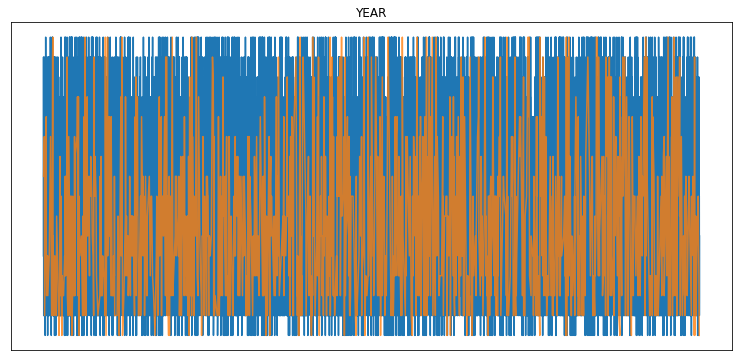

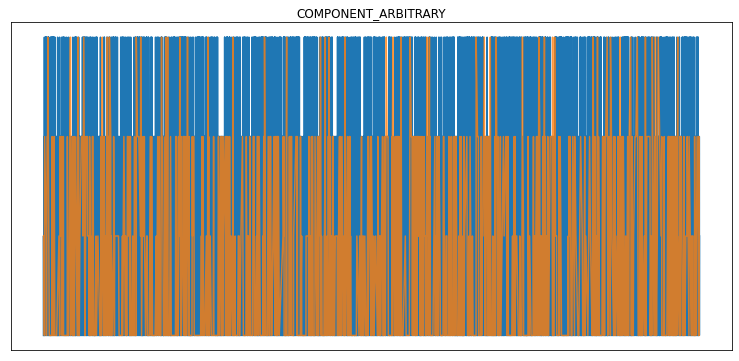

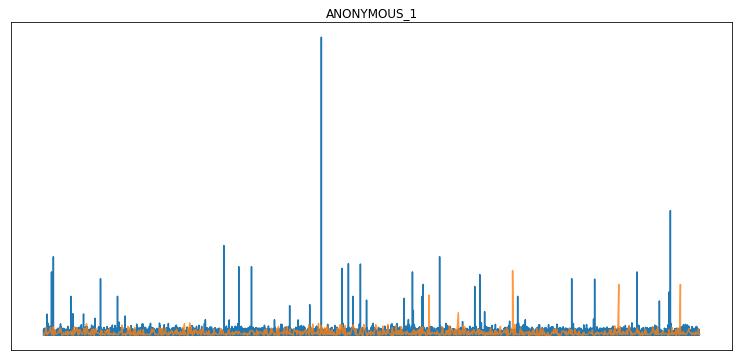

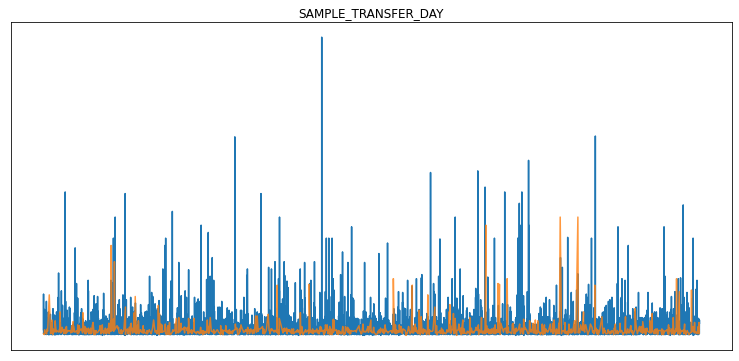

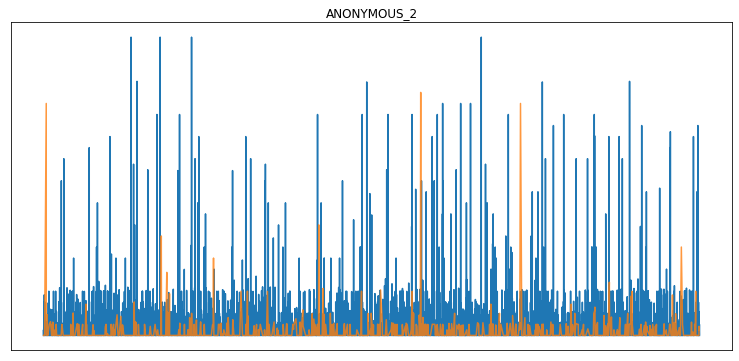

In [14]:
clist = ['YEAR', 'COMPONENT_ARBITRARY', 'ANONYMOUS_1', 'SAMPLE_TRANSFER_DAY', 'ANONYMOUS_2']
simpleplot(train, clist)

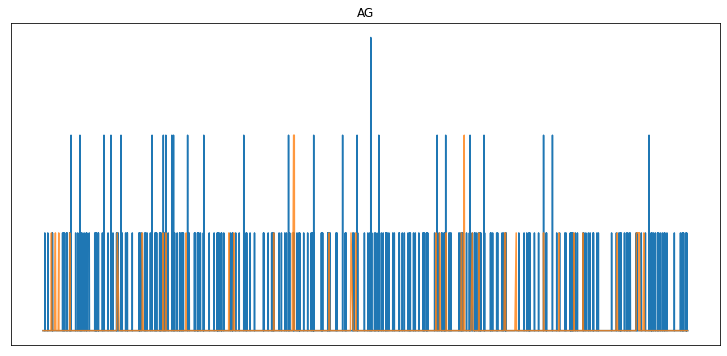

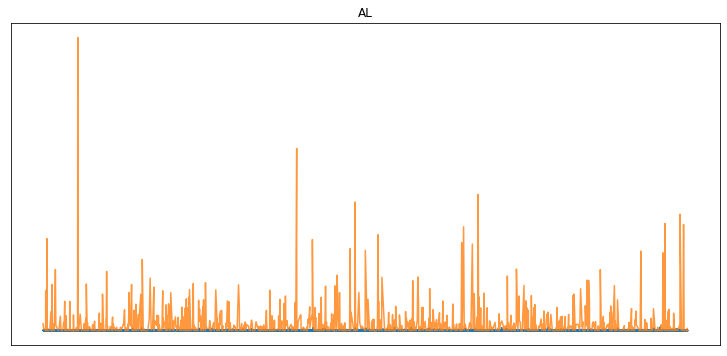

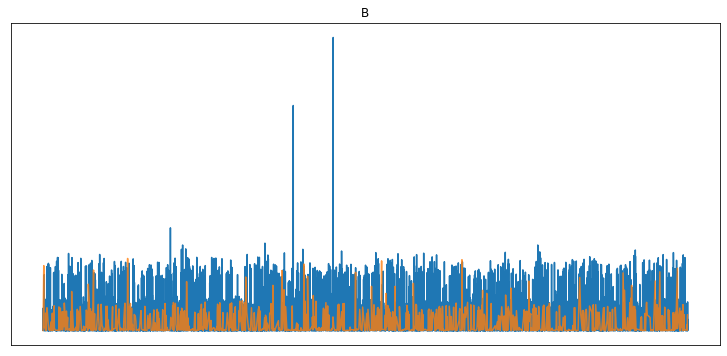

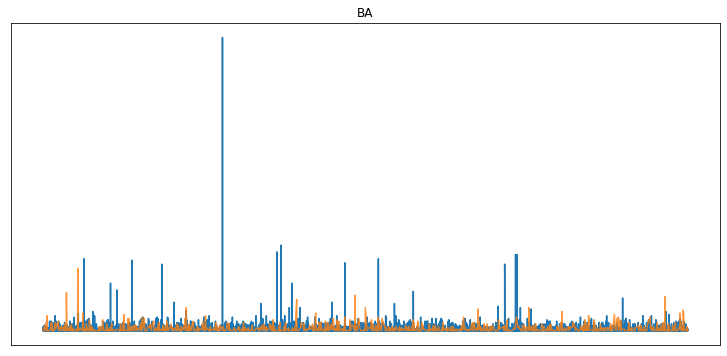

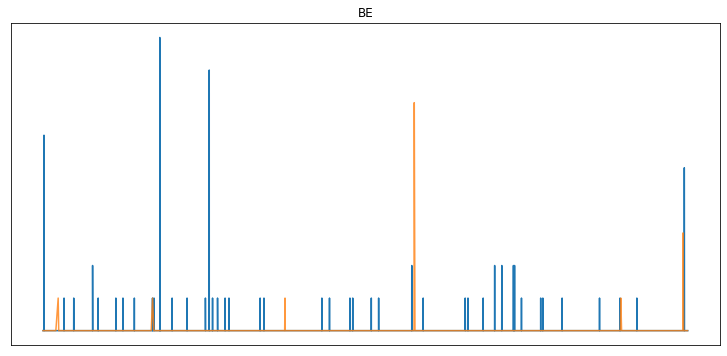

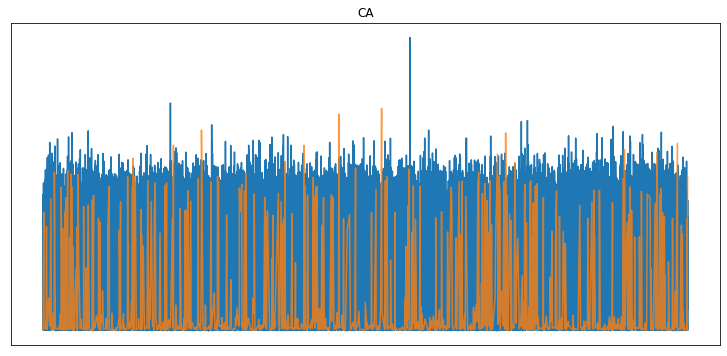

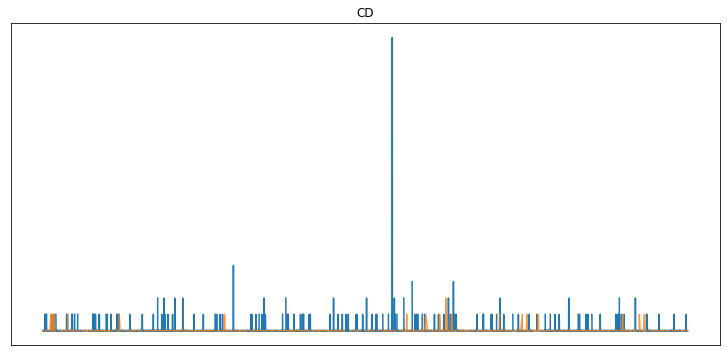

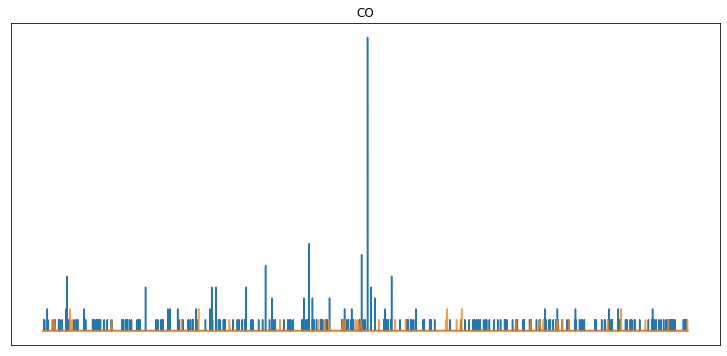

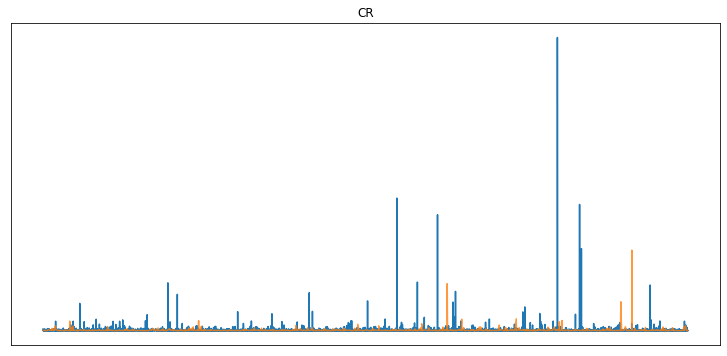

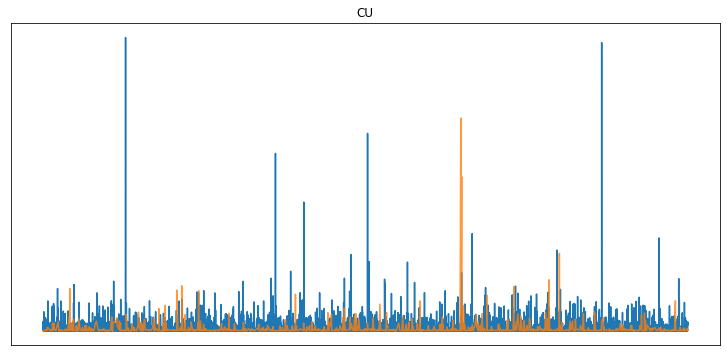

In [15]:
clist = ['AG', 'AL', 'B', 'BA', 'BE', 'CA', 'CD', 'CO', 'CR', 'CU']
simpleplot(train, clist)

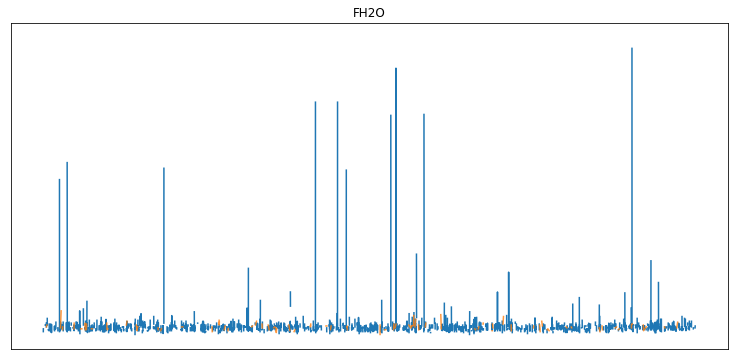

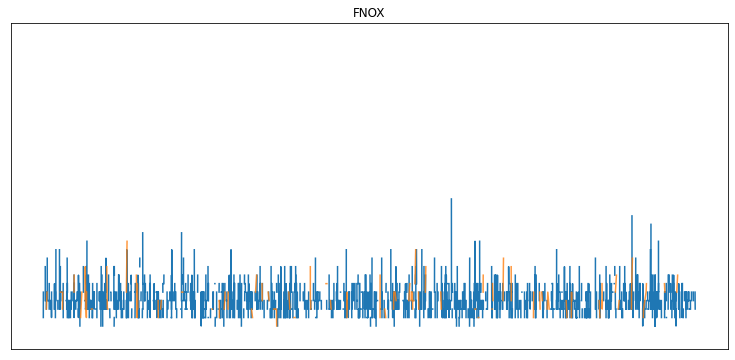

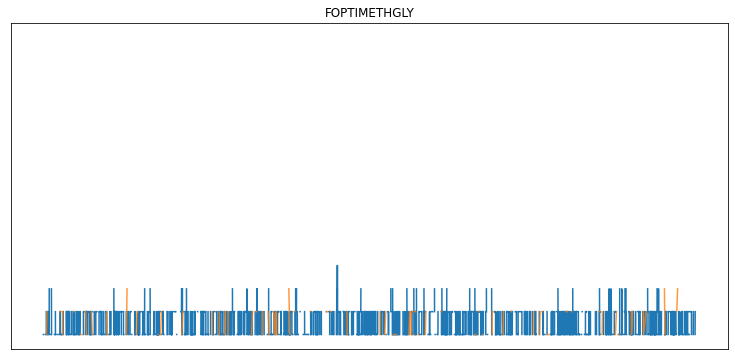

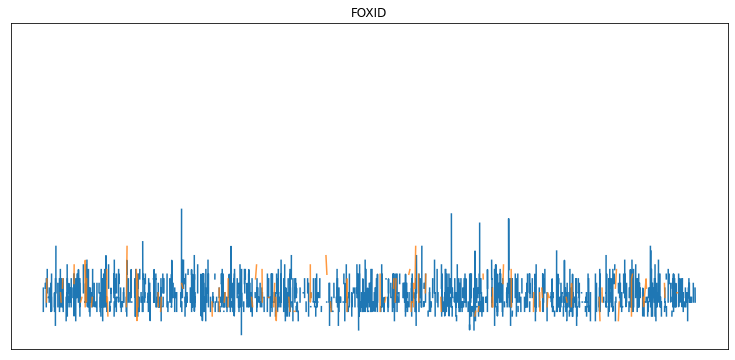

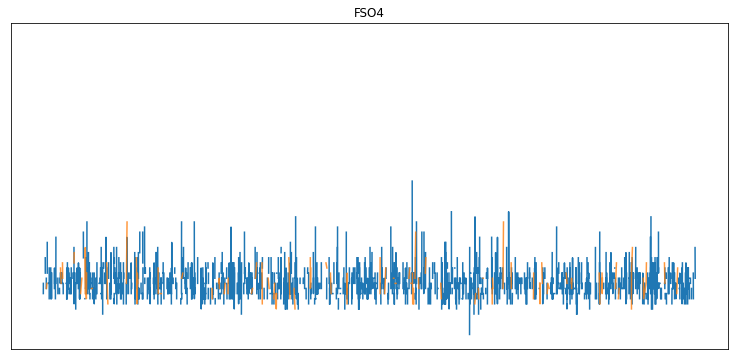

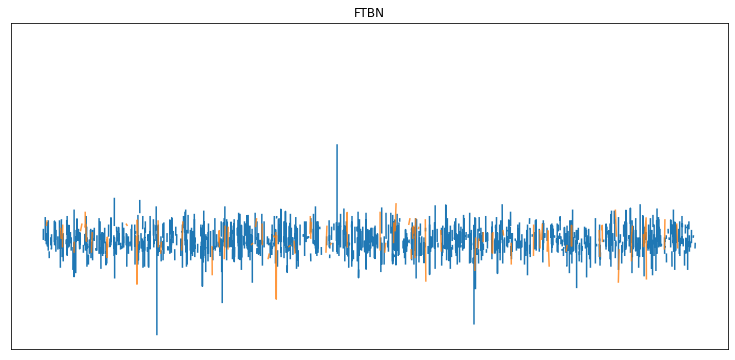

In [16]:
clist = ['FH2O', 'FNOX', 'FOPTIMETHGLY', 'FOXID', 'FSO4', 'FTBN']
simpleplot(train, clist)

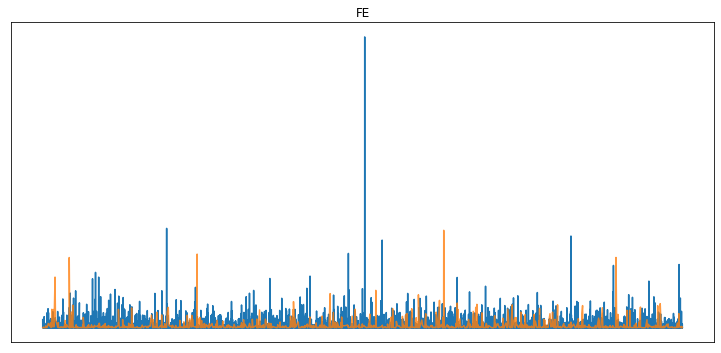

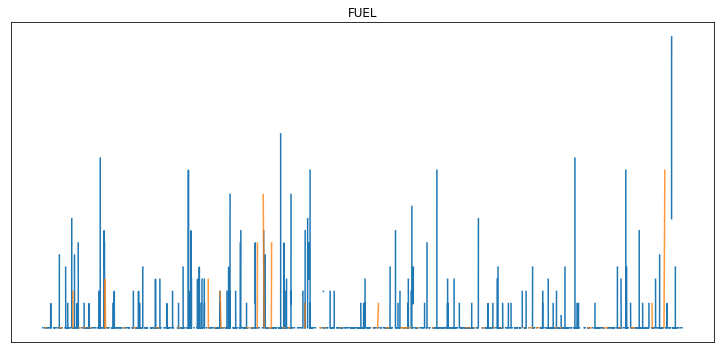

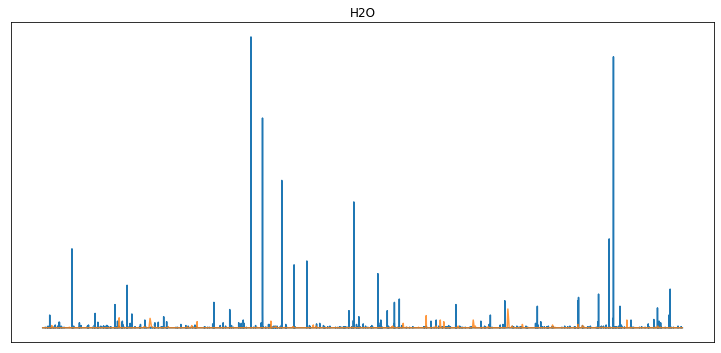

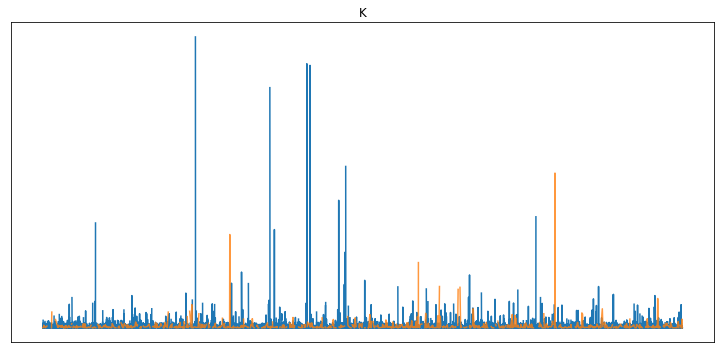

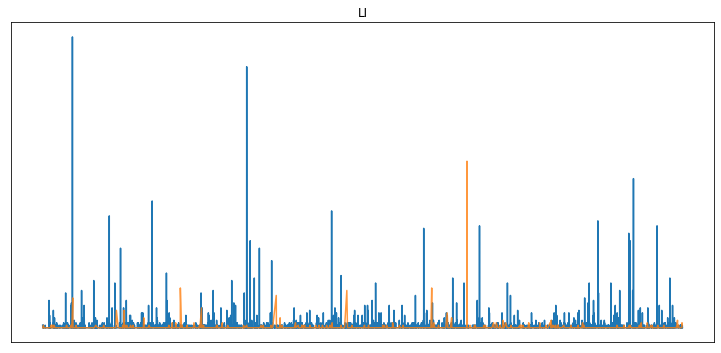

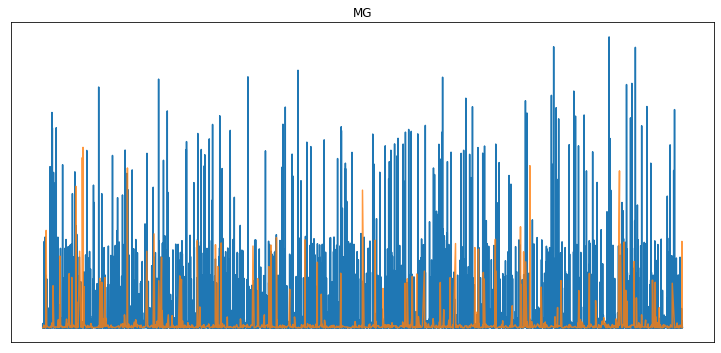

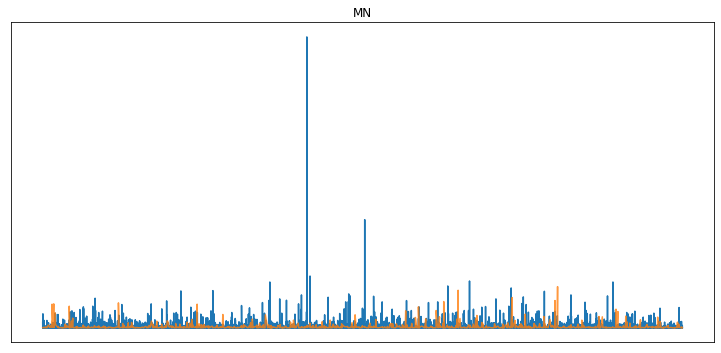

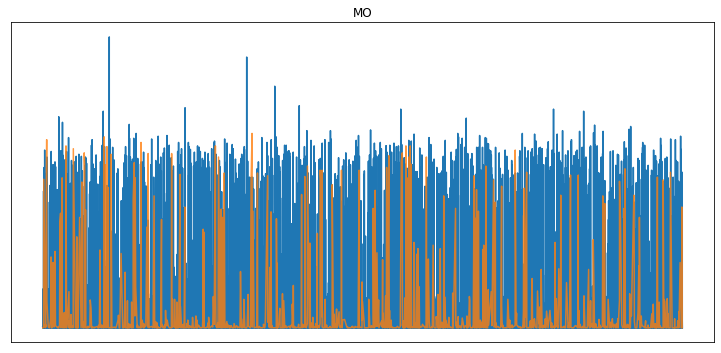

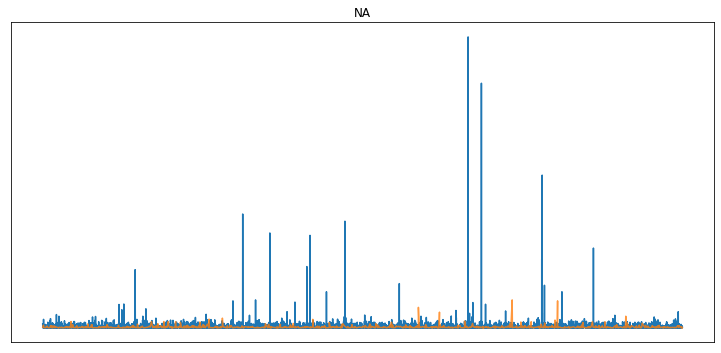

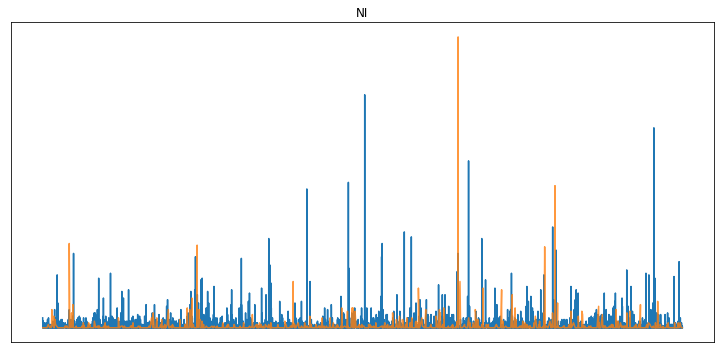

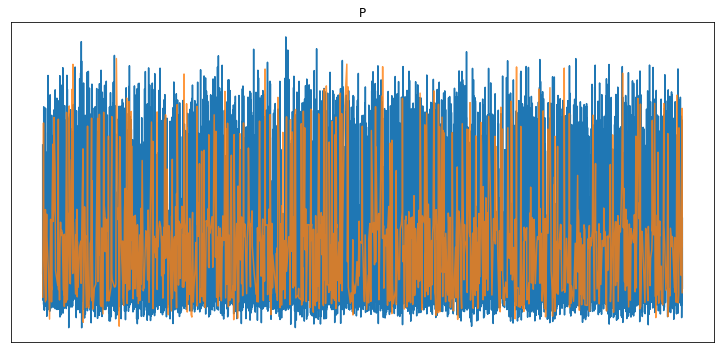

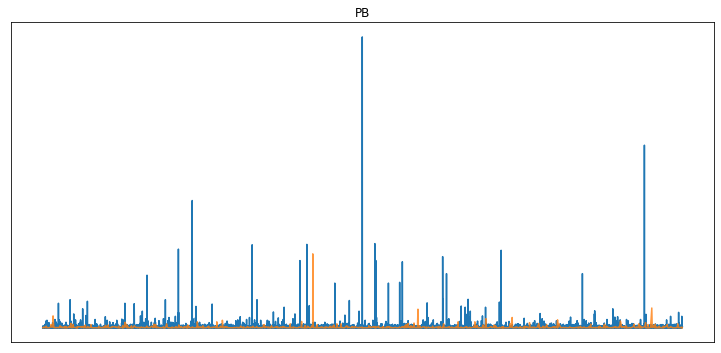

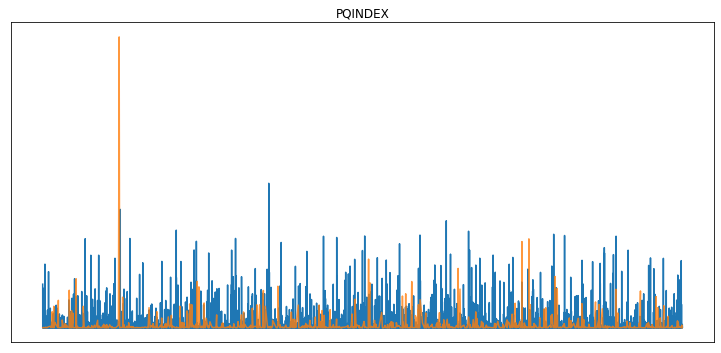

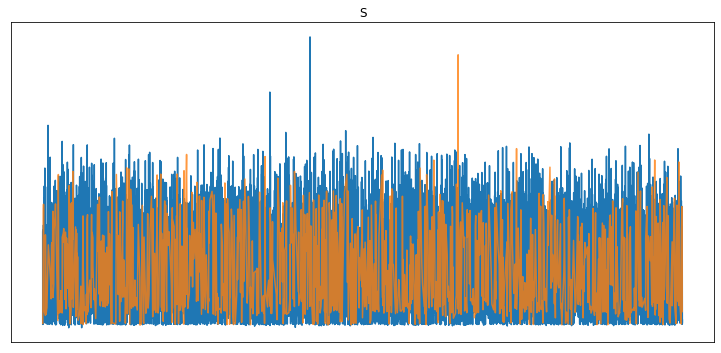

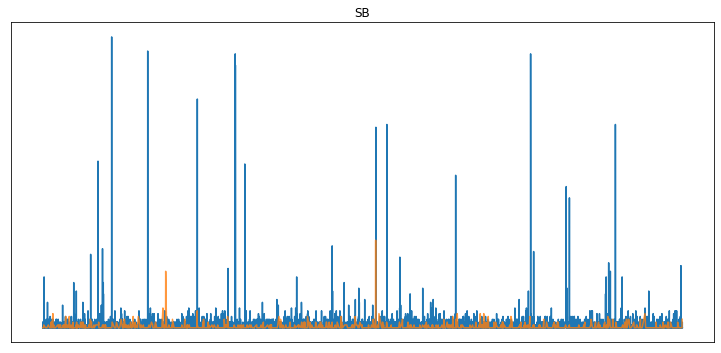

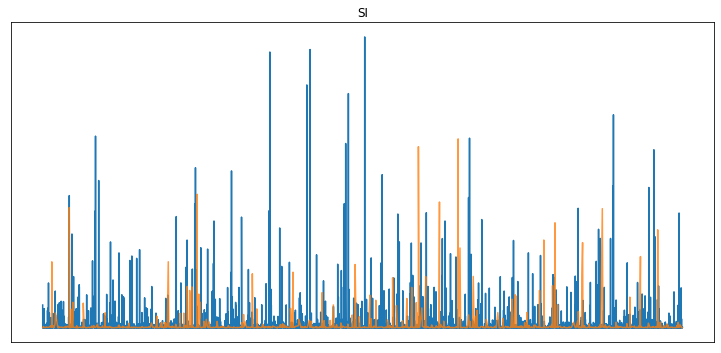

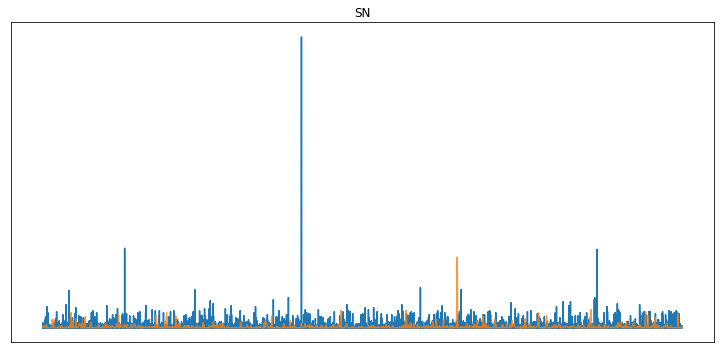

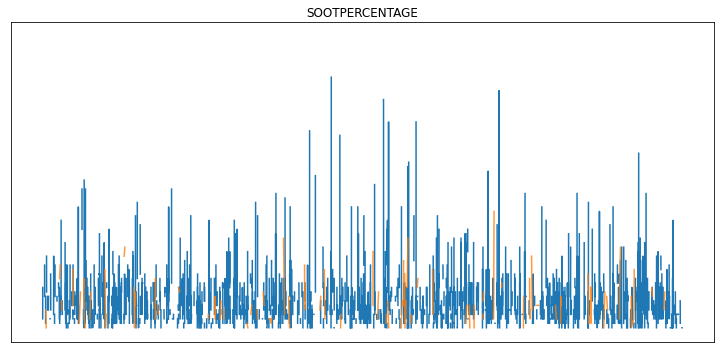

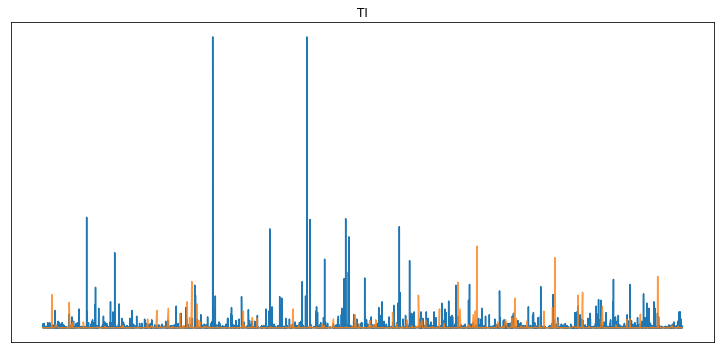

In [17]:
clist = ['FE', 'FUEL', 'H2O', 'K', 'LI', 'MG', 'MN', 'MO', 'NA', 'NI', 'P', 'PB', 'PQINDEX', 'S', 'SB', 'SI', 'SN', 'SOOTPERCENTAGE', 'TI']
simpleplot(train, clist)

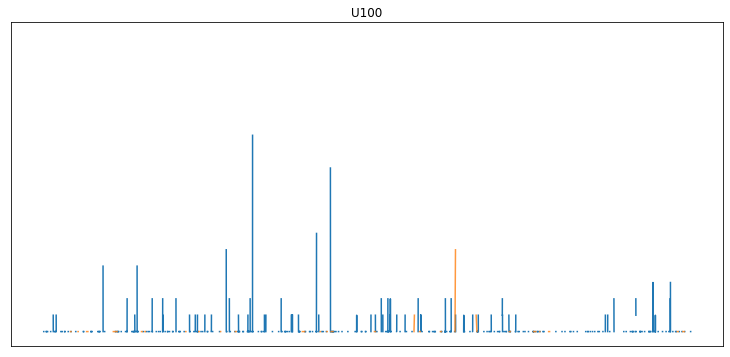

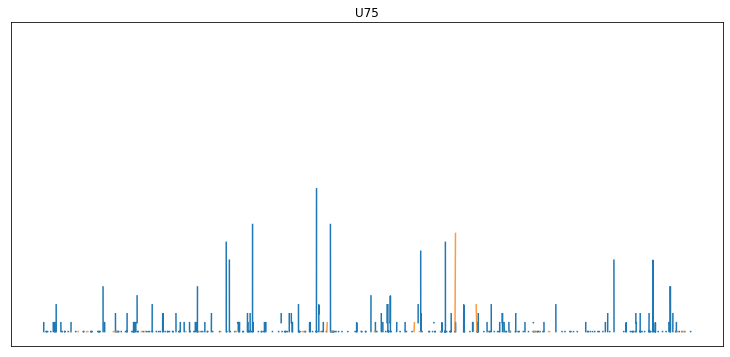

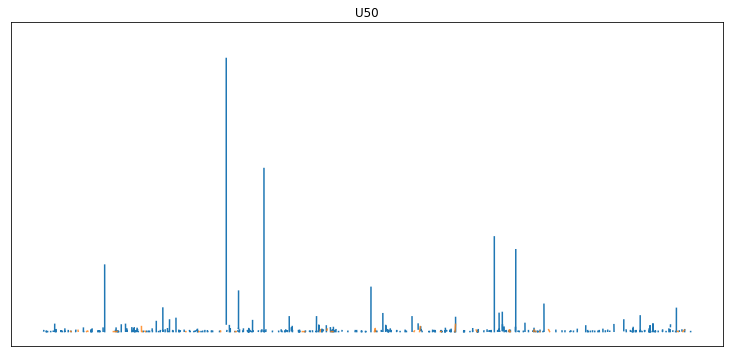

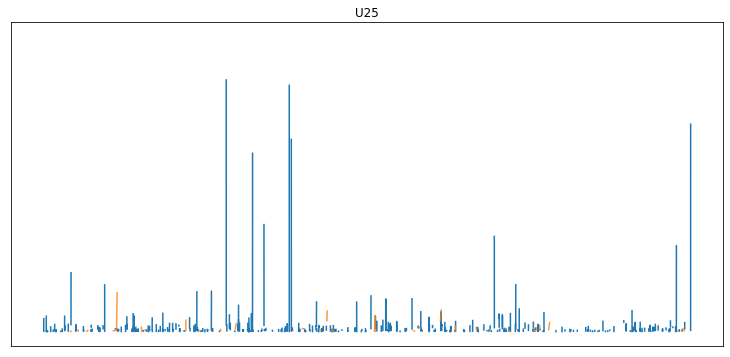

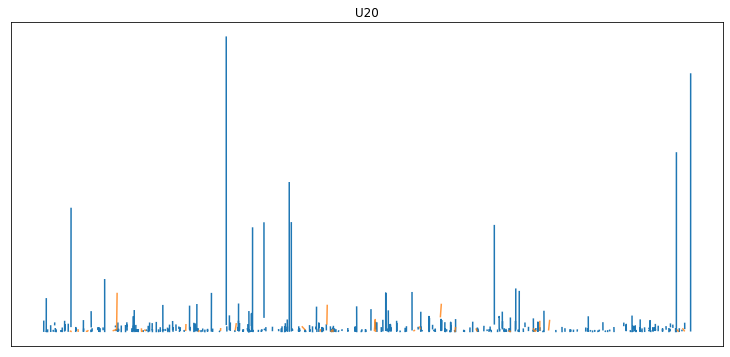

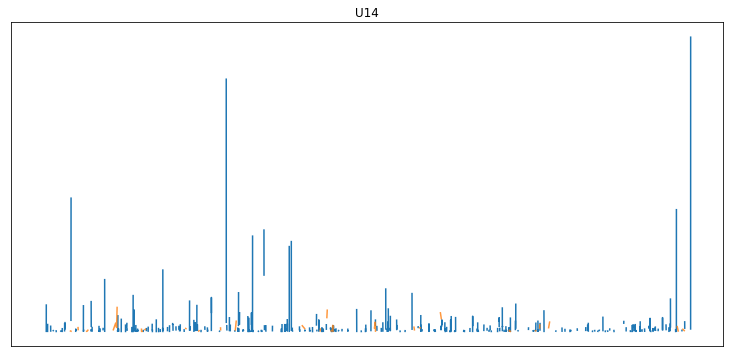

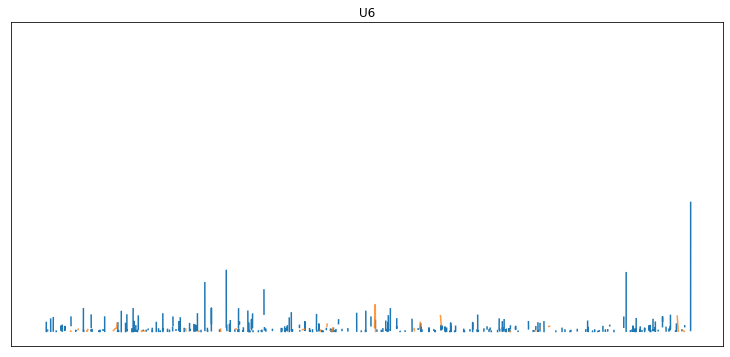

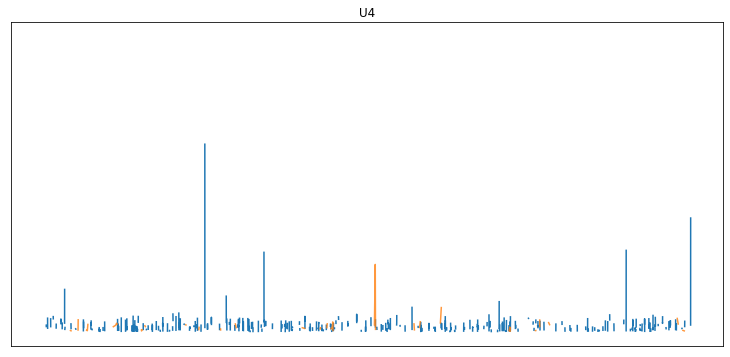

In [18]:
clist = ['U100', 'U75', 'U50', 'U25', 'U20', 'U14', 'U6', 'U4']
simpleplot(train, clist)

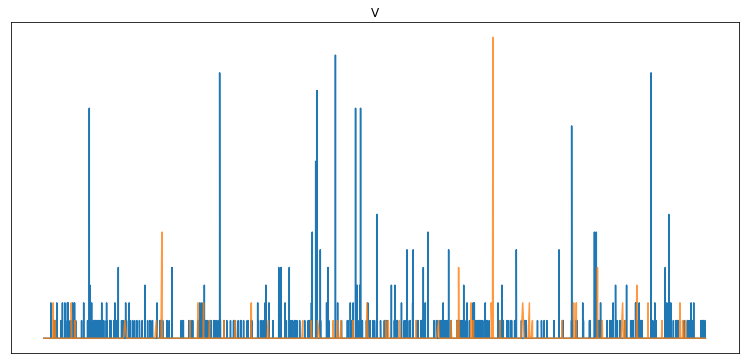

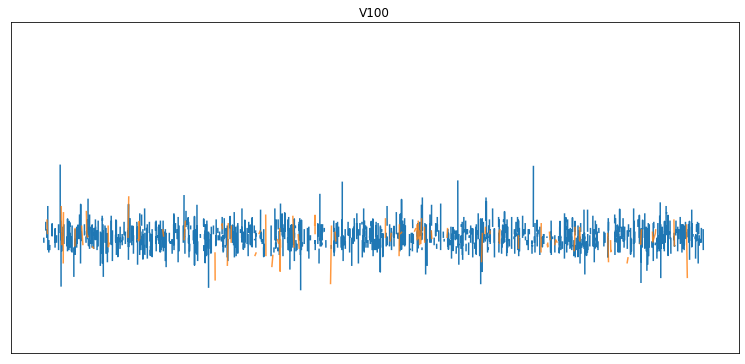

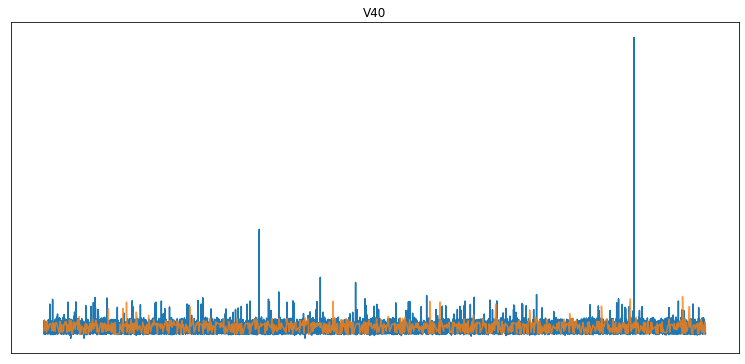

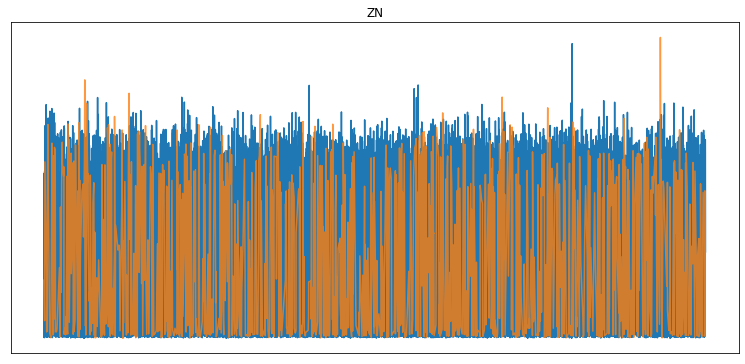

In [19]:
clist = ['V', 'V100', 'V40', 'ZN']
simpleplot(train, clist)

# Insight

- 매우 큰 이상치들이 존재하는 변수들이 다수 있음

- 시도 해볼만한?
    - 매우 큰 이상치들만 찾아서 평균값/최빈값으로 대치

# 상관관계 분석

In [20]:
corr_df = train.corr()
corr_df = corr_df.apply(lambda x : round(x, 2))

In [21]:
unstack_corr_df = corr_df.unstack()
unstack_corr_df

ANONYMOUS_1  ANONYMOUS_1            1.00
             YEAR                   0.11
             SAMPLE_TRANSFER_DAY   -0.04
             ANONYMOUS_2            0.07
             AG                    -0.03
                                    ... 
Y_LABEL      V                      0.02
             V100                   0.01
             V40                    0.02
             ZN                    -0.03
             Y_LABEL                1.00
Length: 2704, dtype: float64

In [22]:
unstack_corr_df_sort = pd.DataFrame(unstack_corr_df[unstack_corr_df < 1].sort_values(ascending=False), columns=['corr'])
unstack_corr_df_sort.style.background_gradient(cmap='viridis')

,,corr
U25,U20,0.900000
U20,U25,0.900000
V40,V100,0.880000
V100,V40,0.880000
U100,U75,0.870000
U75,U100,0.870000
U14,U20,0.860000
U20,U14,0.860000
U6,U4,0.820000
U4,U6,0.820000


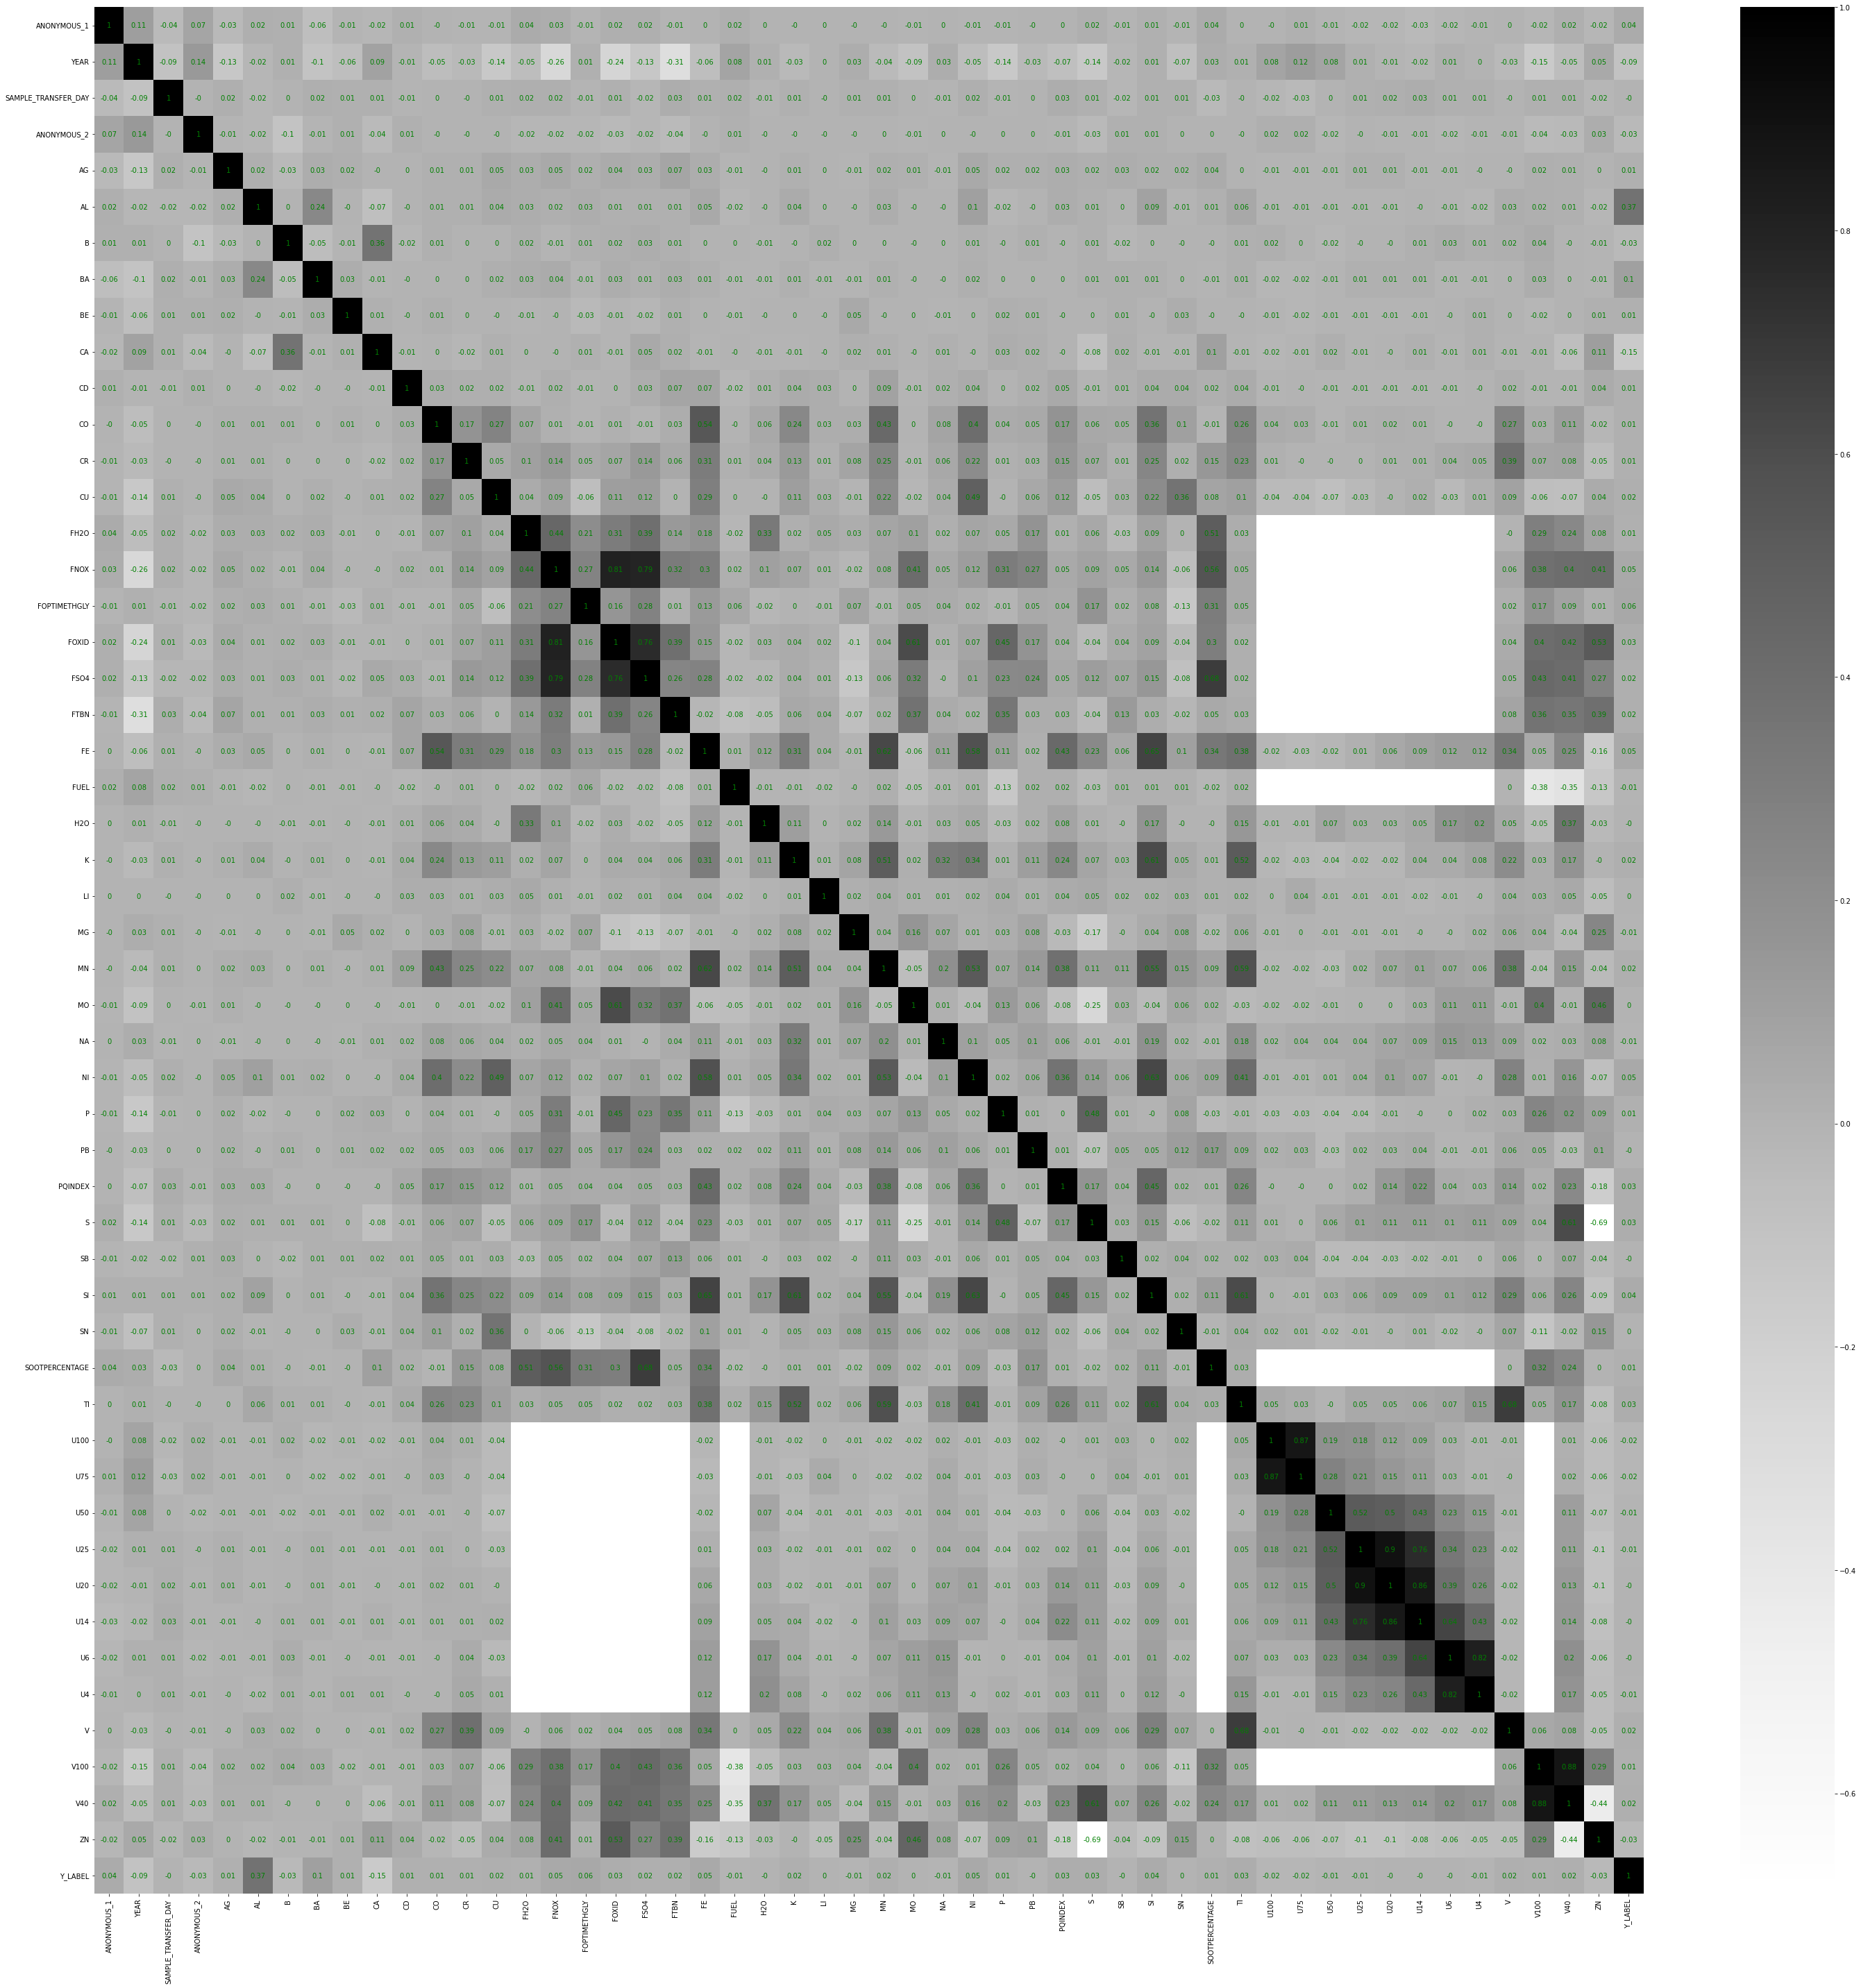

In [23]:
plt.figure(figsize = (50, 50))
ax = sns.heatmap(corr_df, annot=True, annot_kws=dict(color='g'), cmap='Greys')
plt.show()

# Insight

- 수치 변수, 입자 크기 변수들의 경우 상관관계가 매우 높은 것을 확인 (다중 공선성)

- 시도 해볼 만한?
    - 해당 변수들은 제거 후 학습
    - PCA를 이용하여 차원 축소

- 상관관계가 매우 높은 독립변수들이 여럿 존재하기 때문에 많은 변수들을 처리하는 것은 또 데이터에 영향을 끼칠 수 있다. (병목 현상 발생)

In [24]:
train.drop('ID', axis = 1, inplace = True)
test.drop('ID', axis = 1, inplace = True)

In [25]:
def get_values(value):
    return value.values.reshape(-1, 1)

for col in train.columns:
    if (train[col].dtypes == 'object') or (col == 'YEAR'):
        
        dummy_train = pd.get_dummies(train[col], prefix = col, prefix_sep = '__')
        dummy_test = pd.get_dummies(test[col], prefix = col, prefix_sep = '__')

        train = pd.merge(train, dummy_train, left_index = True, right_index = True)
        test = pd.merge(test, dummy_test, left_index = True, right_index = True)

In [26]:
train.drop(['COMPONENT_ARBITRARY','YEAR'], axis = 1, inplace = True)
test.drop(['COMPONENT_ARBITRARY','YEAR'], axis = 1, inplace = True)

# Insight

- COMPONENT_APBITARY, YEAR 변수의 경우 수치적 특성을 갖지 않음
- 더미 변수 생성

In [27]:
train = train.reset_index()
train.drop('index', axis = 1, inplace = True)

In [28]:
train.head()

,ANONYMOUS_1,SAMPLE_TRANSFER_DAY,ANONYMOUS_2,AG,AL,B,BA,BE,CA,CD,...,YEAR__2013,YEAR__2014,YEAR__2015,YEAR__2016,YEAR__2017,YEAR__2018,YEAR__2019,YEAR__2020,YEAR__2021,YEAR__2022
0,1486,7,200,0,3,93,0,0,3059,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1350,51,375,0,2,19,0,0,2978,0.0,...,0,0,0,0,0,0,0,0,1,0
2,2415,2,200,0,110,1,1,0,17,0.0,...,0,0,1,0,0,0,0,0,0,0
3,7389,2,200,0,8,3,0,0,1960,0.0,...,0,0,0,0,0,0,0,0,0,0
4,3954,4,200,0,1,157,0,0,71,0.0,...,0,0,1,0,0,0,0,0,0,0
